In [1]:
# do imports here
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

I saved you some time by pre-downloading some data in .csv format from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/). It is located at:

http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv

You don't even need to download it. You can open it directly with Pandas.

## Part I: Read Earthquake Data

We don't need any `groupby` to do part I

### 1) Use Pandas' read_csv function directly on this url to open it as a DataFrame
(Don't use any special options). Display the first few rows and the DataFrame info.

In [2]:
#load in data
df = pd.read_csv('http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv')

In [3]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


You should have seen that the dates were not automatically parsed into datetime types.

### 2) Re-read the data in such a way that all date columns are identified as dates and the earthquake id is used as the index

Verify that this worked using the `head` and `info` functions.


In [4]:
#Reread date and adjust the id 
df_date = pd.read_csv('http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv',parse_dates=['time'])
df_date = df_date.set_index('id')
df_date.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [5]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120108 entries, ak11155107 to ak11453389
Data columns (total 14 columns):
time         120108 non-null datetime64[ns]
latitude     120108 non-null float64
longitude    120108 non-null float64
depth        120107 non-null float64
mag          120065 non-null float64
magType      120065 non-null object
nst          59688 non-null float64
gap          94935 non-null float64
dmin         85682 non-null float64
rms          119716 non-null float64
net          120108 non-null object
updated      120108 non-null object
place        120108 non-null object
type         120108 non-null object
dtypes: datetime64[ns](1), float64(8), object(5)
memory usage: 13.7+ MB


### 3) Use `describe` to get the basic statistics of all the columns

Note the highest and lowest magnitude of earthquakes in the databse.

In [6]:
df_date.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
std,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046
min,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000


### 4) Use `nlargest` to get the top 20 earthquakes by magnitude

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nlargest.html

In [7]:
#get the top 20 earthquakes by magnitude
large_mag = df_date.nlargest(20,'mag')
large_mag

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
usc000nzvd,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
usc000rki5,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
usc000p27i,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
usc000phx5,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
usb000pr89,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
usc000piqj,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.885,1.00,us,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
usb000slwn,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.078,0.70,us,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
usb000pq41,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.250,1.20,us,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
usc000pft9,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.729,0.88,us,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake


Examine the structure of the `place` column. The country information seems to be in there. How would you get it out?

### 5) Extract the country using Pandas [text data functions](https://pandas.pydata.org/pandas-docs/stable/text.html)

Add it as a new column to the dataframe.

In [8]:
#extract the country data by finding it using comma
country = df_date.place.str.split(',').str[-1]

#add it as a new column to dataframe
df_date = df_date.join(country,how='left',rsuffix='country_new')
df_date

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,placecountry_new
id,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.708100,90.200,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.130900,0.000,1.33,ml,4.0,171.430000,0.342000,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,Nevada
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.252800,7.100,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,Alaska
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.957500,96.500,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,Alaska
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.692500,10.590,1.34,ml,6.0,285.000000,0.043210,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,Mexico
ci11419722,2014-01-31 23:30:36.930,32.567667,-117.013500,0.010,1.51,ml,16.0,264.000000,0.080810,0.2100,ci,2014-02-01T00:09:04.470Z,"3km N of Tijuana, Mexico",quarry blast,Mexico
ci11419714,2014-01-31 23:28:04.020,33.359000,-116.360500,12.980,1.17,ml,26.0,163.000000,0.032660,0.1200,ci,2014-02-01T00:54:07.630Z,"11km N of Borrego Springs, California",earthquake,California
ak11151127,2014-01-31 23:22:52.000,62.800200,-150.696500,86.400,1.50,ml,NaN,NaN,NaN,0.4700,ak,2014-01-31T23:33:23.190Z,"61km NNW of Talkeetna, Alaska",earthquake,Alaska
ak11151125,2014-01-31 23:20:42.000,58.169500,-151.992400,50.100,2.10,ml,NaN,NaN,NaN,0.3700,ak,2014-01-31T23:25:57.118Z,"48km NNE of Kodiak, Alaska",earthquake,Alaska


### 6) Display each unique value from the country column

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html

In [9]:
#display unique value
df_date.placecountry_new.unique()

array([' Alaska', ' Nevada', ' Mexico', ' California',
       ' Papua New Guinea', ' New Zealand', ' Missouri',
       'South of the Fiji Islands', ' Montana', ' British Virgin Islands',
       ' Washington', ' Oregon', ' Canada', ' Fiji', 'Wyoming',
       ' Antarctica', ' Chile', ' Utah', ' Indonesia', ' Solomon Islands',
       ' Micronesia', ' Oklahoma', ' Hawaii', ' Wyoming', ' Russia',
       ' Arizona', ' Philippines', ' Bolivia', ' Greece', ' Japan',
       ' Puerto Rico', ' Iran', ' Tonga', ' Wallis and Futuna',
       ' Colorado', ' Guam', ' CA', 'Carlsberg Ridge', ' Idaho',
       ' Pakistan', 'Off the west coast of northern Sumatra', ' Burma',
       ' China', ' Peru',
       'Off the east coast of the North Island of New Zealand',
       ' Costa Rica', 'Reykjanes Ridge', ' East Timor',
       'Central East Pacific Rise', 'Mid-Indian Ridge', ' Japan region',
       ' Northern Mariana Islands', ' El Salvador', ' Samoa',
       'Northern Mid-Atlantic Ridge', ' Taiwan', ' Arka

### 7) Make a bar chart of the top 5 earthquake magnitudes vs country/state 

Text(0.5,1,'Top 5 Earthquake Magnitude vs Country/State')

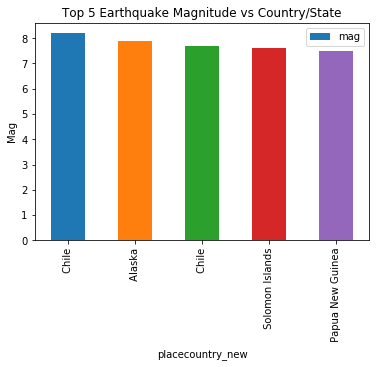

In [10]:
#find the top 5 earthquake magnitudes
top_five = df_date.nlargest(5,'mag')
top_five

#create a bar chart
axis = top_five.plot(kind='bar', x='placecountry_new', y='mag')
axis.set_ylabel('Magnitude')
axis.set_title('Top 5 Earthquake Magnitude vs Country/State')

### 8) Create a filtered dataset that only has earthquakes of magnitude 4 or larger and

In [11]:
#create a filter for large magnitude earthquake data
df_fil = df_date.query('mag> = 4')

### 9) Make a histogram the distribution of the Earthquake magnitudes

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.hist.html
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

Do one subplot for the filtered and one for the unfiltered dataset.
Use a Logarithmic scale. What sort of relationship do you see?

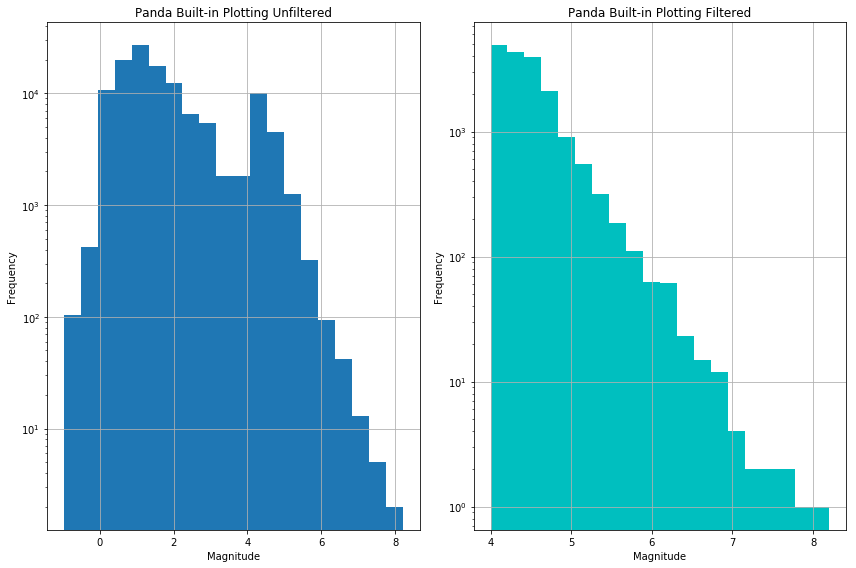

In [12]:
#Use matplotlib here to help with graphing
fig, ax = plt.subplots(figsize=(12,8),ncols = 2)
ax0,ax1 = ax

#for filter dataset
#We observe a bell-shaped curve which somehow resembles the normal distribution
df_date.mag.plot.hist(ax=ax0,bins=20,log=True,grid = True)
ax0.set_title('Panda Built-in Plotting Unfiltered')
ax0.set_xlabel('Magnitude')
ax0.set_ylabel('Frequency')

#for unfiltered dataset
#We observe a skewed curve because we only look at filtered high magnitude data
#note that the y axes have different magnitudes
df_fil.mag.plot.hist(ax=ax1,bins=20,color='c',log=True,grid = True)
ax1.set_title('Panda Built-in Plotting Filtered')
ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Frequency')

plt.tight_layout()

### 11) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude.

Do both the filtered and unfiltered datasets. Color it by magnitude. Make it pretty

What difference do you note between the filtered and unfiltered datasets?

Text(0.5,17.2,'longitude')

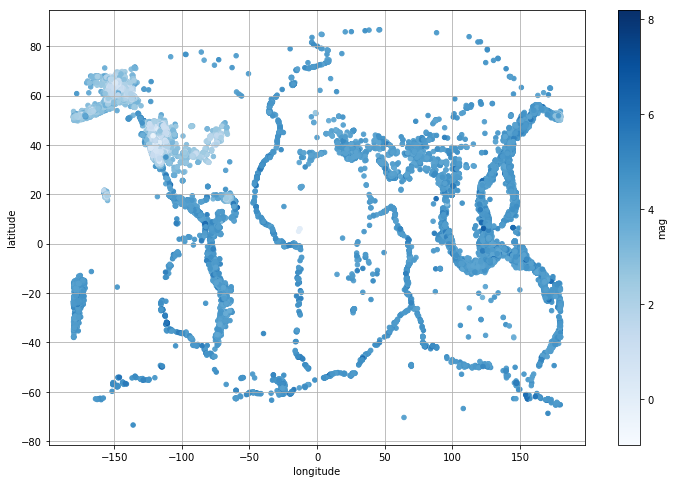

In [26]:
#Use matplotlib here to help with graphing
fig, ax = plt.subplots(figsize=(12,8))

#for all unfiltered earthquake data
# We observe that for the data-rich regions of US,
#there are large numbers of low magnitude earthquakes recorded
#for other regions, low magnitude data are not that conscientiously recorded 
df_date.plot(ax=ax, kind='scatter', x ='longitude', y ='latitude',c = 'mag',cmap='Blues',grid=True)
ax00.set_xlabel('longitude')

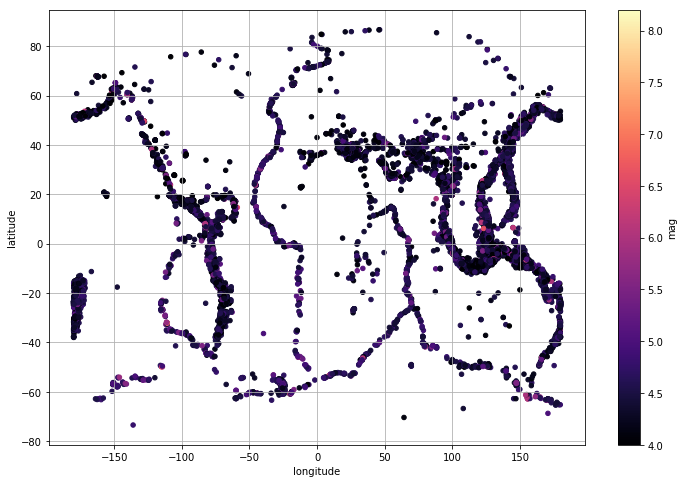

In [27]:
#Use matplotlib here to help with graphing
fig, ax = plt.subplots(figsize=(12,8))

#for filtered high magnitude data
#Once we have filtered the data
#it is not that the US has more low-mag earthquakes
#because the data is collected by usgs,
#minor earthquakes at STATE-LEVEL in the US get included in the dataset 
df_fil.plot(ax=ax,kind='scatter', x='longitude', y='latitude',c = 'mag',cmap='magma',grid=True)